# House Price Prediction

## About the Dataset:

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Table of Content:

- Import libraries
- Load the data
- EDA
- Data preprocessing
- Train the models
- Evaluate the models
- Model comparison
- Conclusions

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [3]:
# Load the data

df = pd.read_csv('train.csv')

In [5]:
# EDA

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.shape

(1460, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


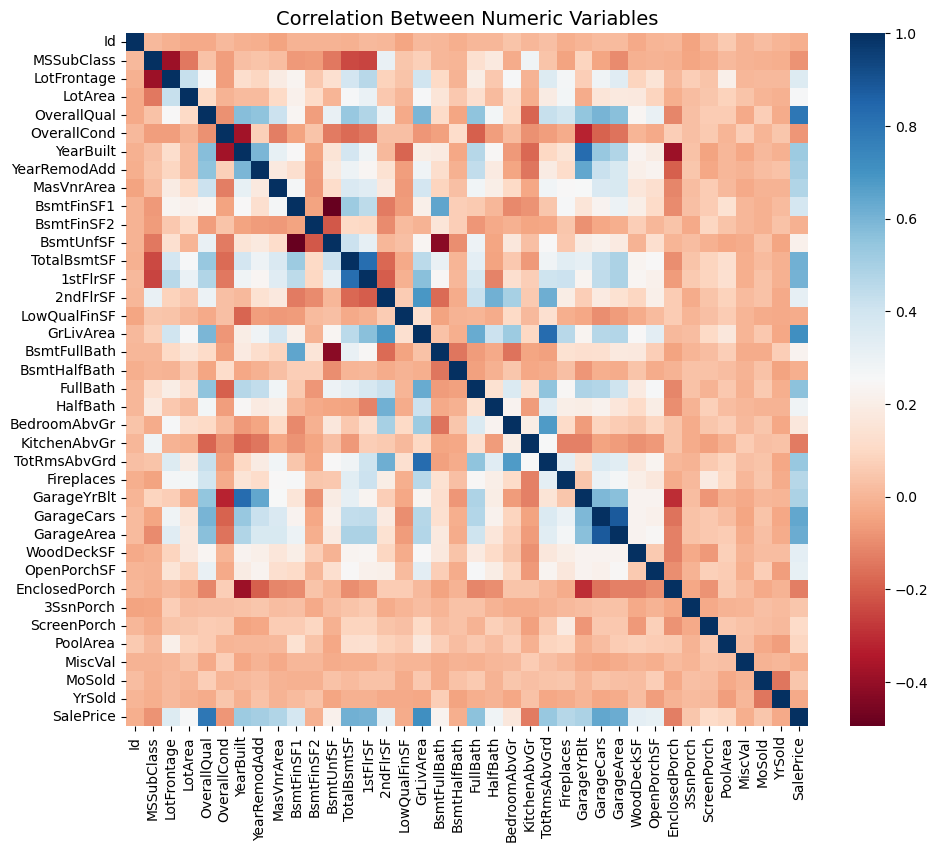

In [13]:
# Visualize correlation between numerical variables

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(11, 9))
sns.heatmap(correlation_matrix, cmap='RdBu')
plt.title("Correlation Between Numeric Variables", size=14)
plt.show()

- Let's select numerical features which have more than 0.50 or less than -0.50 correlation rate.
- For categorical features, let's select the ones that might have significant effect on the target variable.

In [15]:
# Feature selection

important_num_cols = list(numeric_df.corr()['SalePrice'][(numeric_df.corr()['SalePrice'] > 0.50) | (numeric_df.corr()['SalePrice'] < -0.50)].index)
cat_cols = ['MSZoning', 'Utilities', 'BldgType', 'Heating', 'KitchenQual', 'SaleCondition', 'LandSlope']
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [17]:
df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856,1710,2,8,2,548,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920,1786,2,6,2,608,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961,1717,1,7,3,642,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [19]:
# Check for missing values

print("Missing Values by Column")
print("-" * 26)
print(df.isna().sum())
print("-" * 26)
print("Total Missing Values: ", df.isna().sum().sum())

Missing Values by Column
--------------------------
OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
SalePrice        0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64
--------------------------
Total Missing Values:  0


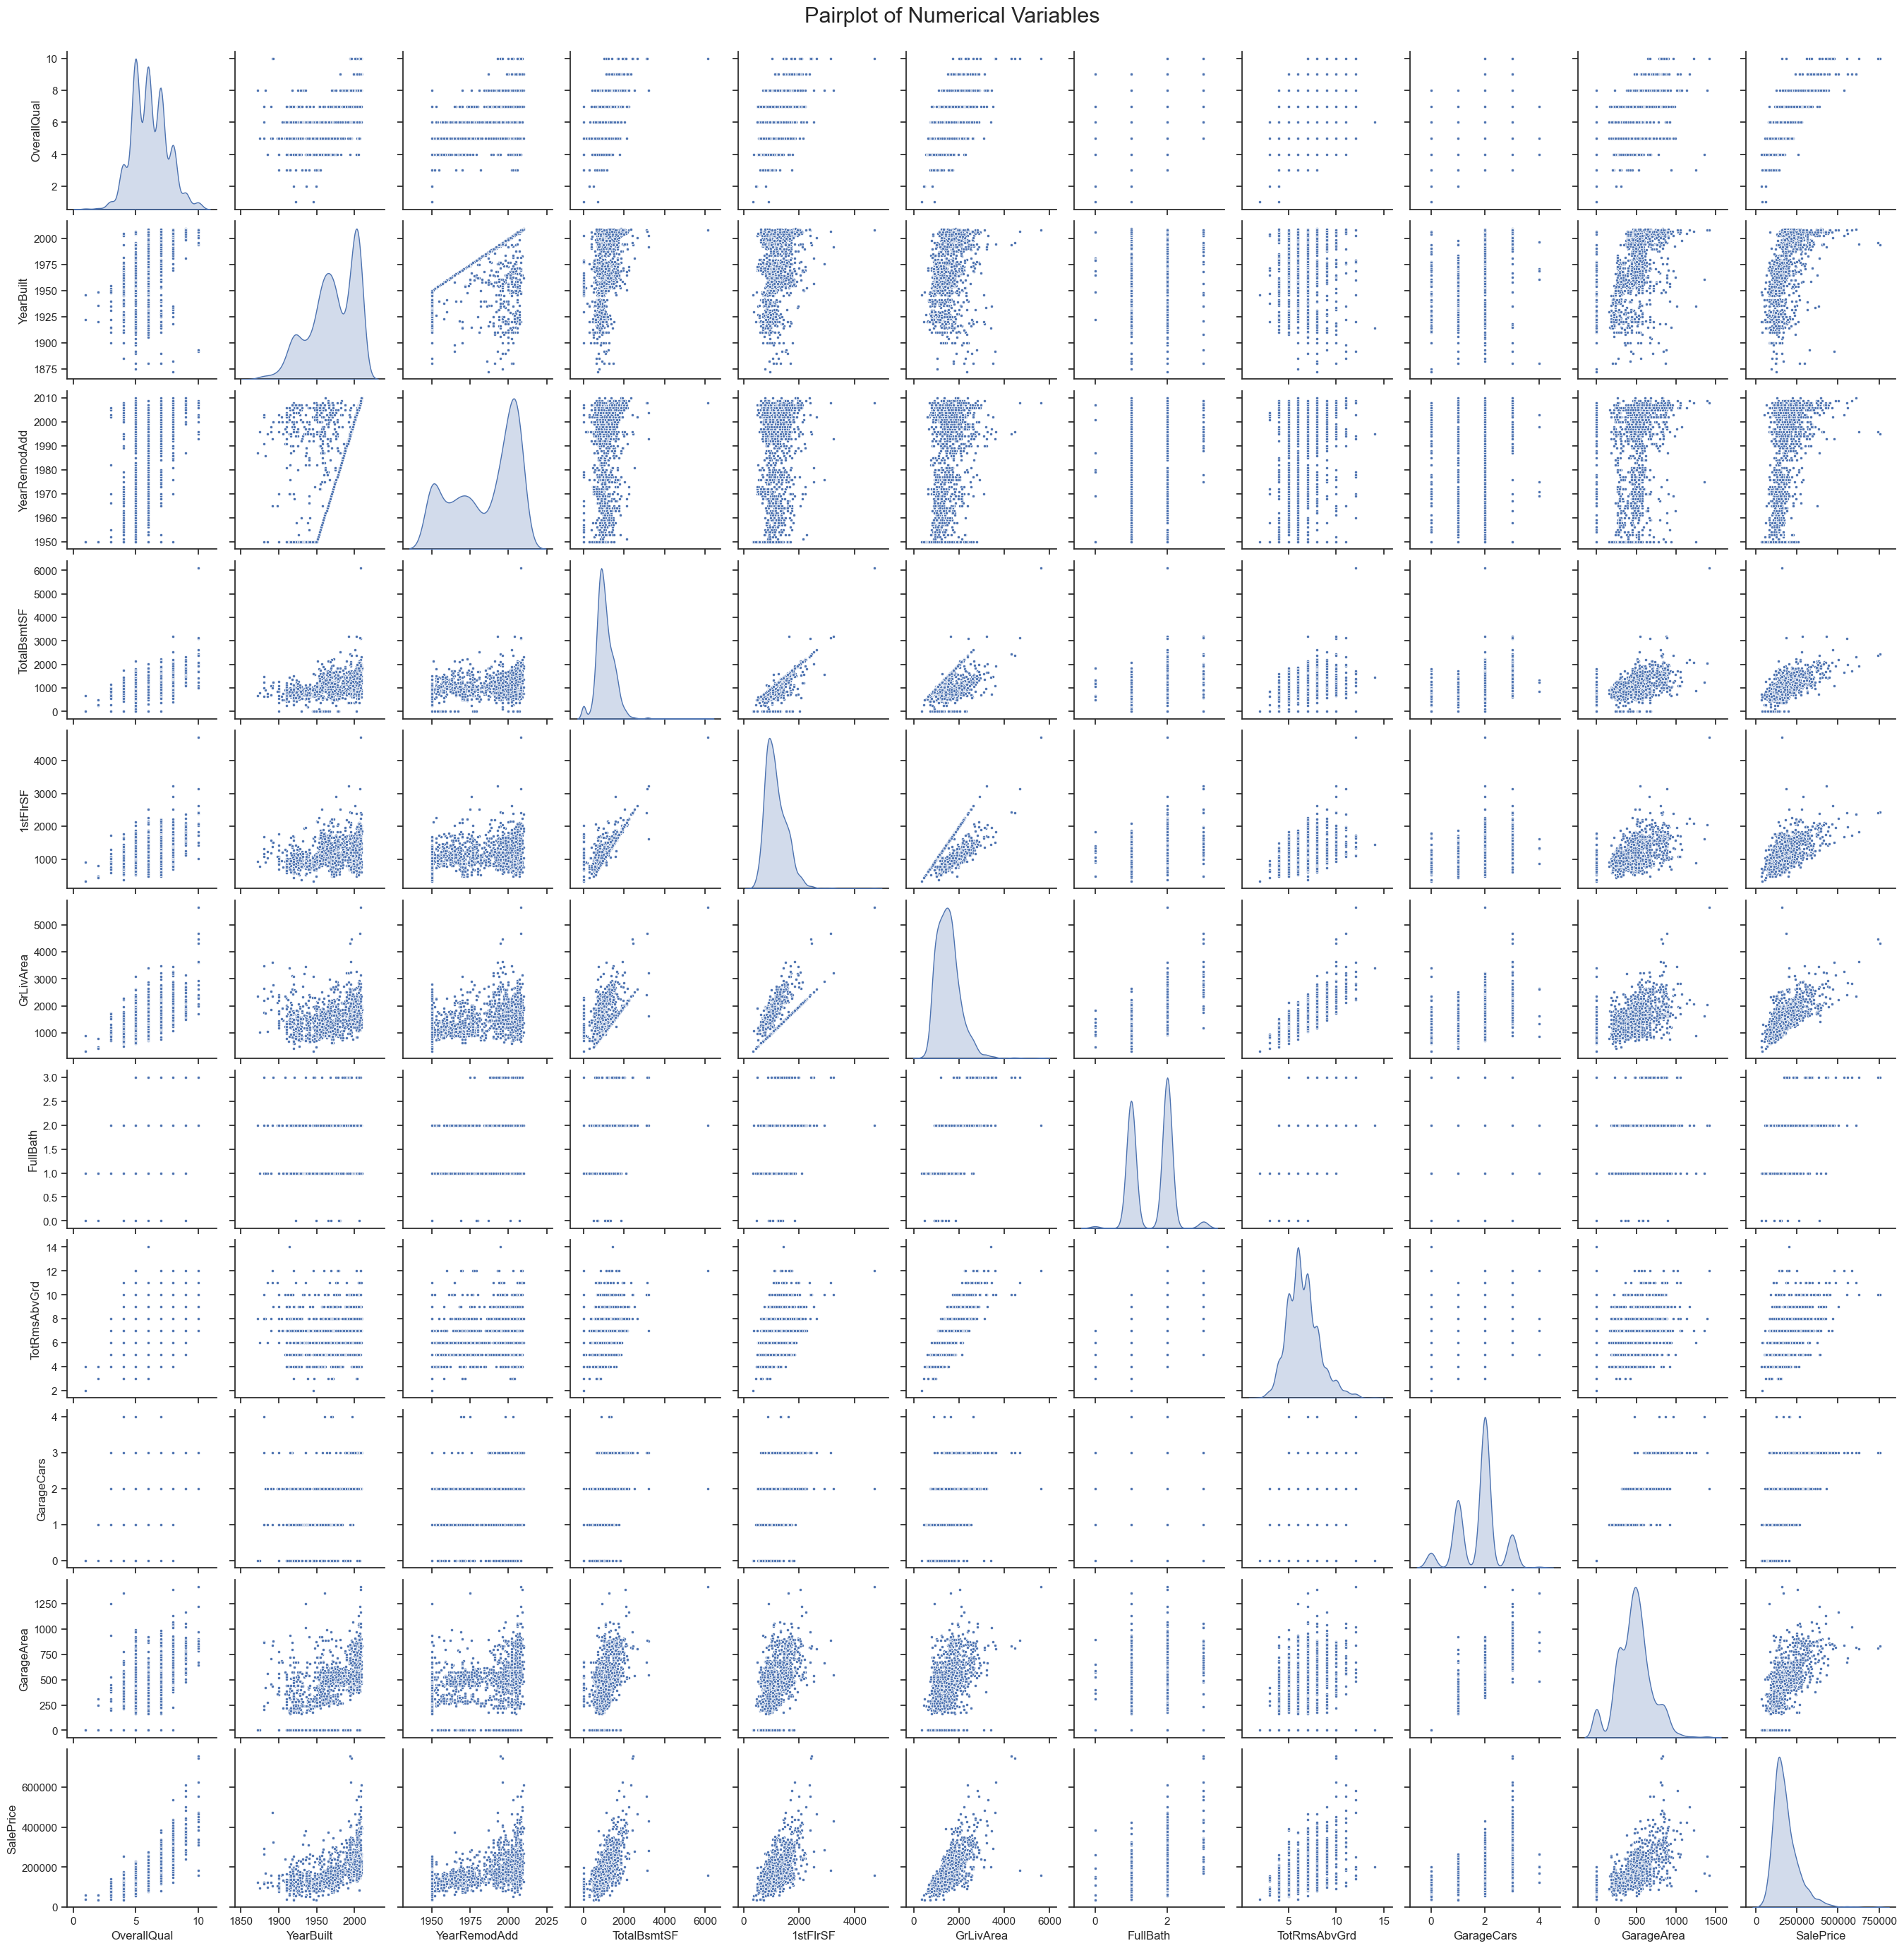

In [21]:
# Data visualization: Visualizing correlation between numerical variables using a pairplot

sns.set(style='ticks')
pairplot = sns.pairplot(df[important_num_cols], diag_kind='kde', markers='.')
pairplot.fig.suptitle('Pairplot of Numerical Variables', y=1.01, fontsize=22)
plt.show()

<Figure size 700x600 with 0 Axes>

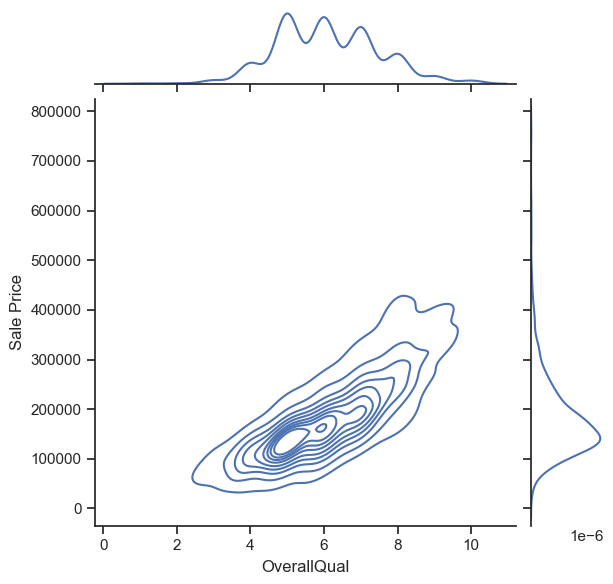

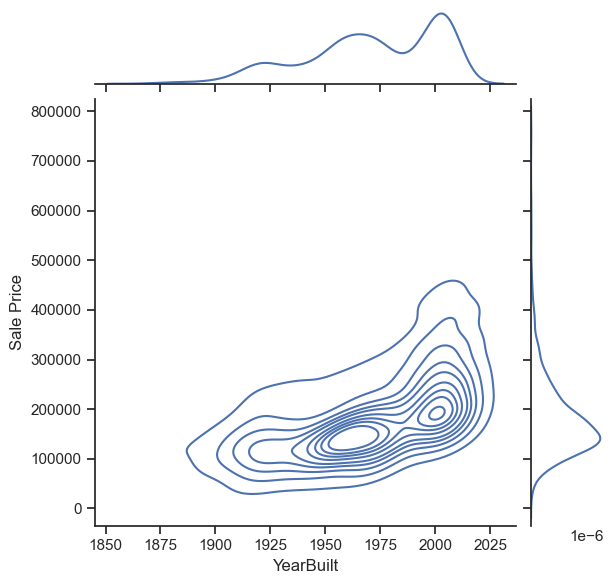

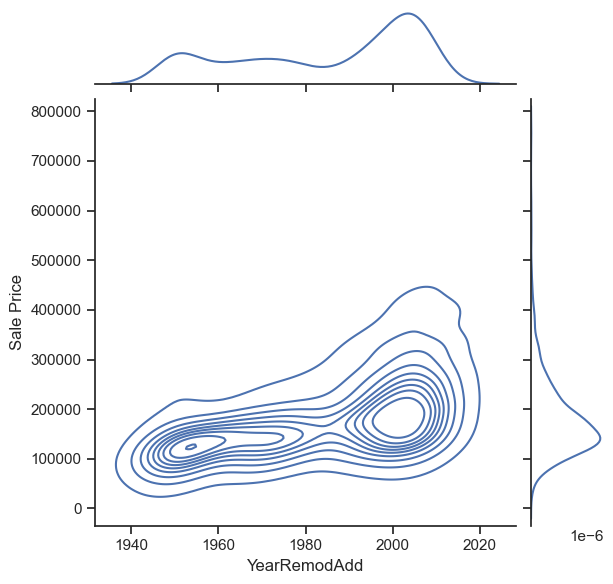

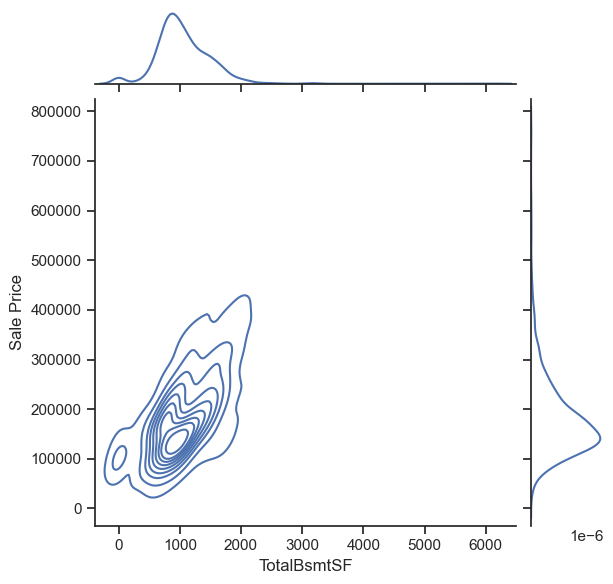

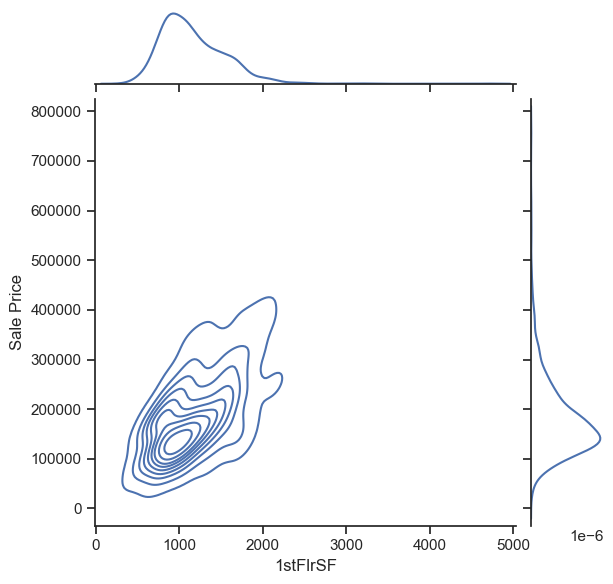

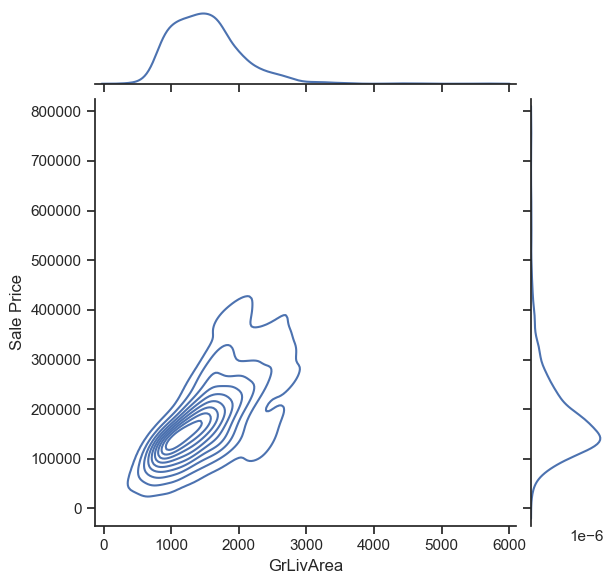

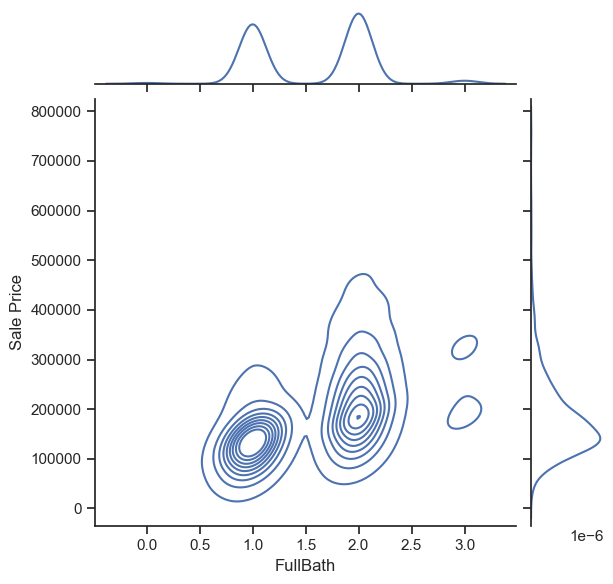

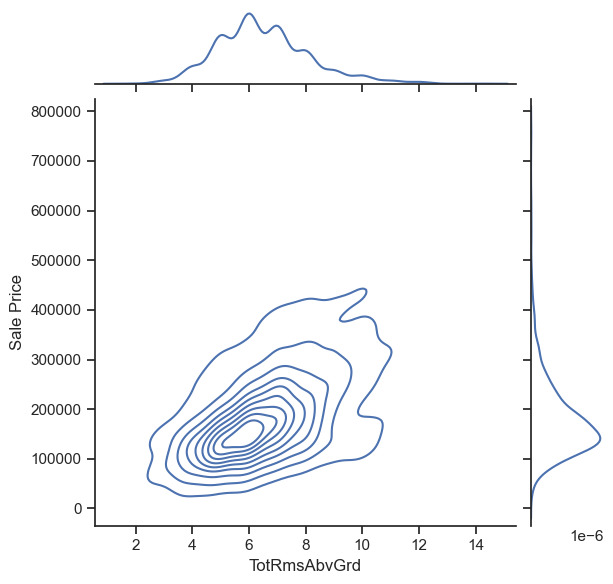

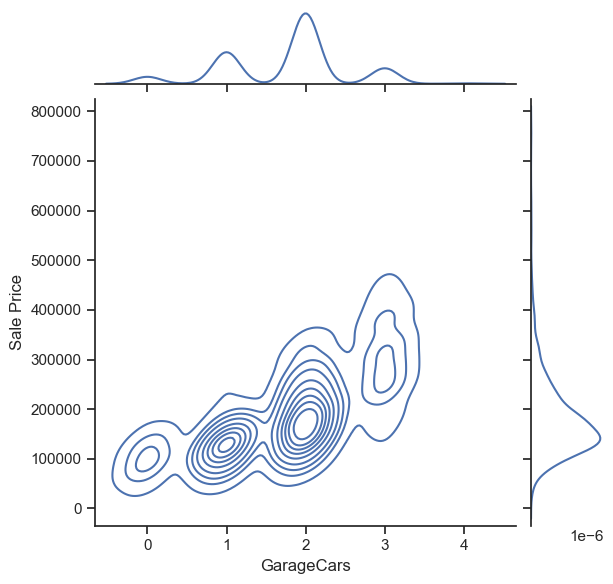

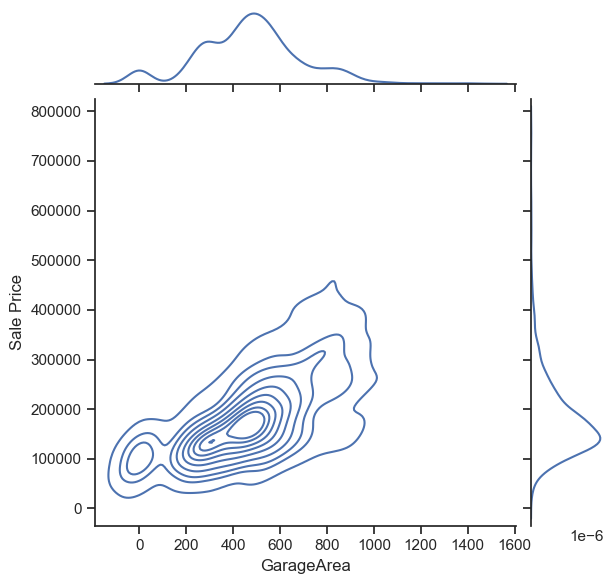

In [23]:
# Visualizing the correlation between selected columns and the target variable using jointplots

plt.figure(figsize=(7, 6))

numerical_columns = ["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", 
                     "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea"]

for column in numerical_columns:
    sns.jointplot(x=df[column], y=df["SalePrice"], kind="kde")
    plt.xlabel(column)
    plt.ylabel('Sale Price')

plt.show()

In [25]:
# Data preprocessing: X, y split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [27]:
# Encoding categorical features

X = pd.get_dummies(X, columns=cat_cols)

In [29]:
# Scaling

important_num_cols.remove("SalePrice")

scaler = StandardScaler()
X[important_num_cols] = scaler.fit_transform(X[important_num_cols])

In [31]:
X.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,KitchenQual_TA,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000,...,False,False,False,False,False,True,False,True,False,False
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731,...,True,False,False,False,False,True,False,True,False,False
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726,...,False,False,False,False,False,True,False,True,False,False
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804,...,False,True,False,False,False,False,False,True,False,False
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485,...,False,False,False,False,False,True,False,True,False,False


In [33]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Print shapes

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1168, 41)
X_test shape:  (292, 41)
y_train shape:  (1168,)
y_test shape:  (292,)


In [37]:
# Defining functions for evaluation

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)).mean()
    
    return rmse

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    
    return mae, mse, rmse, r_squared

In [39]:
# Train & evaluate the models: Initialize an empty list to store model evaluations

model_results = []

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

# Calculate evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r_squared)
print('-' * 40)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(lr)
print('RMSE Cross-Validation:', rmse_cross_val)

# Store results in a dictionary
model_result = {'Model': 'Linear Regression', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r_squared, 'RMSE (Cross-Validation)': rmse_cross_val}
model_results.append(model_result)

# Convert the list of dictionaries to a DataFrame
models = pd.DataFrame(model_results)

MAE: 23567.89056594338
MSE: 1414931404.6297867
RMSE: 37615.573963848896
R2 Score: 0.8155317822983864
----------------------------------------
RMSE Cross-Validation: 35933.12897629359


In [41]:
# Ridge Regression

ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

# Calculate evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r_squared)
print('-' * 40)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(ridge)
print('RMSE Cross-Validation:', rmse_cross_val)

# Store results in a dictionary
model_result = {'Model': 'Ridge', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r_squared, 'RMSE (Cross-Validation)': rmse_cross_val}
model_results.append(model_result)

# Convert the list of dictionaries to a DataFrame
models = pd.DataFrame(model_results)

MAE: 23435.50371200826
MSE: 1404264216.8595603
RMSE: 37473.51353769166
R2 Score: 0.8169224907874506
----------------------------------------
RMSE Cross-Validation: 35887.852791598336


In [43]:
# Lasso Regression

lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

# Calculate evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r_squared)
print('-' * 40)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(lasso)
print('RMSE Cross-Validation:', rmse_cross_val)

# Store results in a dictionary
model_result = {'Model': 'Lasso', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r_squared, 'RMSE (Cross-Validation)': rmse_cross_val}
model_results.append(model_result)

# Convert the list of dictionaries to a DataFrame
models = pd.DataFrame(model_results)

MAE: 23560.458080272358
MSE: 1414337628.5020947
RMSE: 37607.680445649596
R2 Score: 0.815609194407292
----------------------------------------
RMSE Cross-Validation: 35922.76936876075


In [45]:
# Elastic Net

elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

# Calculate evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r_squared)
print('-' * 40)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(elastic_net)
print('RMSE Cross-Validation:', rmse_cross_val)

# Store results in a dictionary
model_result = {'Model': 'ElasticNet', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r_squared, 'RMSE (Cross-Validation)': rmse_cross_val}
model_results.append(model_result)

# Convert the list of dictionaries to a DataFrame
models = pd.DataFrame(model_results)

MAE: 23792.743784996725
MSE: 1718445790.1371388
RMSE: 41454.14080809225
R2 Score: 0.7759618373822291
----------------------------------------
RMSE Cross-Validation: 38449.00864609558


In [47]:
# Support Vector Machines

svr = SVR(C=100000)
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

# Calculate evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r_squared)
print('-' * 40)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(svr)
print('RMSE Cross-Validation:', rmse_cross_val)

# Store results in a dictionary
model_result = {'Model': 'SVR', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r_squared, 'RMSE (Cross-Validation)': rmse_cross_val}
model_results.append(model_result)

# Convert the list of dictionaries to a DataFrame
models = pd.DataFrame(model_results)

MAE: 17843.162286486535
MSE: 1132136370.7718587
RMSE: 33647.23422172852
R2 Score: 0.852400492470445
----------------------------------------
RMSE Cross-Validation: 30745.475236180606


In [49]:
# Random Forest Regressor

RF = RandomForestRegressor(n_estimators=100)
RF.fit(X_train, y_train)
predictions = RF.predict(X_test)

# Calculate evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r_squared)
print('-' * 40)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(RF)
print('RMSE Cross-Validation:', rmse_cross_val)

# Store results in a dictionary
model_result = {'Model': 'Random Forest', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r_squared, 'RMSE (Cross-Validation)': rmse_cross_val}
model_results.append(model_result)

# Convert the list of dictionaries to a DataFrame
models = pd.DataFrame(model_results)

MAE: 18210.83380748532
MSE: 927228596.0748912
RMSE: 30450.428503961833
R2 Score: 0.8791148419207941
----------------------------------------
RMSE Cross-Validation: 31252.610297524392


In [51]:
# XGBoost Regressor

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

# Calculate evaluation metrics
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r_squared)
print('-' * 40)

# Calculate RMSE using cross-validation
rmse_cross_val = rmse_cv(xgb)
print('RMSE Cross-Validation:', rmse_cross_val)

# Store results in a dictionary
model_result = {'Model': 'XGBoost', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2 Score': r_squared, 'RMSE (Cross-Validation)': rmse_cross_val}
model_results.append(model_result)

# Convert the list of dictionaries to a DataFrame
models = pd.DataFrame(model_results)

MAE: 17985.48701038099
MSE: 837038411.4275047
RMSE: 28931.616121943563
R2 Score: 0.8908731664315402
----------------------------------------
RMSE Cross-Validation: 29952.055052411022


In [53]:
# Model comparison

models.sort_values(by='RMSE (Cross-Validation)')

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
6,XGBoost,17985.487010,8.370384e+08,28931.616122,0.890873,29952.055052
4,SVR,17843.162286,1.132136e+09,33647.234222,0.852400,30745.475236
5,Random Forest,18210.833807,9.272286e+08,30450.428504,0.879115,31252.610298
1,Ridge,23435.503712,1.404264e+09,37473.513538,0.816922,35887.852792
2,Lasso,23560.458080,1.414338e+09,37607.680446,0.815609,35922.769369
0,Linear Regression,23567.890566,1.414931e+09,37615.573964,0.815532,35933.128976
3,ElasticNet,23792.743785,1.718446e+09,41454.140808,0.775962,38449.008646


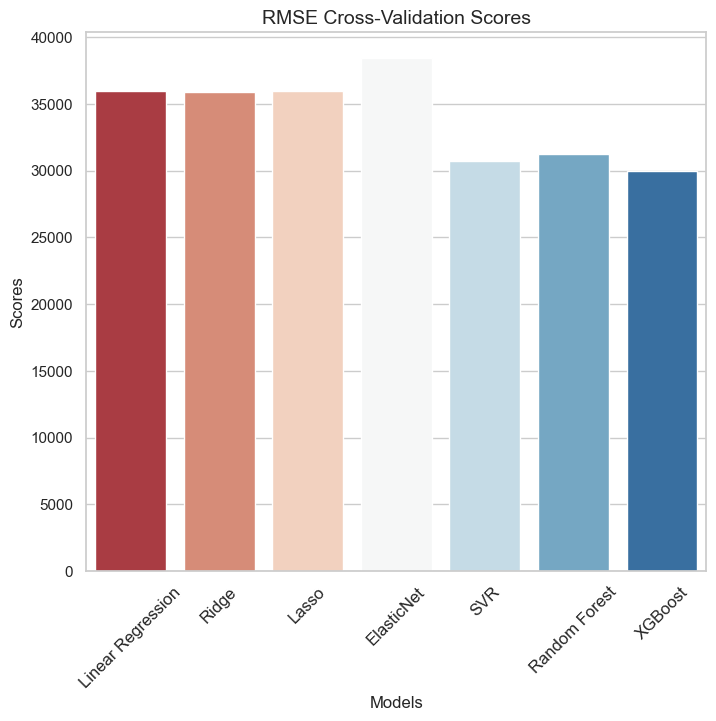

In [55]:
# Lets plot the model comparison

sns.set_style("whitegrid")
plt.figure(figsize=(8, 7))
sns.barplot(x=models['Model'], y=models['RMSE (Cross-Validation)'], palette='RdBu')
plt.title('RMSE Cross-Validation Scores', size=14)
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45, size=12)
plt.show()

*Conclusion:*

In this project, we analyzed a dataset containing information about house prices. After importing the necessary libraries and loading the data, we conducted exploratory data analysis (EDA) to understand the dataset's characteristics. We checked for missing values, visualized the correlation between numerical features using a heatmap, and selected relevant features based on correlation thresholds.

For data preprocessing, we split the data into predictor variables (X) and the target variable (y), encoded categorical variables, and scaled numerical features. Subsequently, we split the data into training and testing sets using train_test_split and created evaluation functions for assessing model performance.

We trained and evaluated several regression models, including Linear Regression, Ridge Regression, Lasso Regression, Elastic Net, Random Forest, Support Vector Regression (SVR), and XGBoost. We compared their performance using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R2) score, and Cross-Validation RMSE.

Among the models evaluated, XGBoost achieved the second lowest MAE, and the lowest RMSE, along with the highest R2 score, indicating its superior performance in predicting house prices. SVR and Random Forest also performed well, while Ridge, Lasso, ElasticNet, and Linear Regression showed lower performance.

Overall, our analysis suggests that ensemble methods like XGBoost can effectively capture complex relationships in the data and provide accurate predictions of house prices. Further fine-tuning and optimization of these models could potentially enhance their performance even further.